In [1]:
# import packages and functions.

import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 60) 


import matplotlib.pyplot as plt
# make sure the matplotlib model having a ordinary display.
%matplotlib inline  

plt.rcParams['font.size'] = 24 # global font size


from IPython.core.pylabtools import figsize


import seaborn as sns
sns.set(font_scale = 2)

import SDV.fea_eng as sf

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Step1: Clean the data

In [2]:
data = pd.read_csv('D:\\Energy_and_Water_Data_Disclosure.csv')

print(data.shape)

data.head(3)

(11746, 60)


Order  Property Id               Property Name Parent Property Id  \
0      1        13286                     201/205              13286   
1      2        28400  NYP Columbia (West Campus)              28400   
2      3      4778226               MSCHoNY North              28400   

         Parent Property Name BBL - 10 digits  \
0                     201/205      1013160001   
1  NYP Columbia (West Campus)      1021380040   
2  NYP Columbia (West Campus)      1021380030   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   

  Address 1 (self-reported)      Address 2 Postal Code Street Number  \
0  201/205  East  42nd  st.  Not Available       10017           675   
1          622 168th Street  Not Available       10032           180   
2             3975 Broadway  Not Available       10032          3975   

            Street Name    Borough  DOF Gross Floor Area  \
0              3 AVENUE  Manhattan              289356.0   
1  FT WASHINGTON AVENUE  Manhattan             3693539.0   
2              BROADWAY  Manhattan              152765.0   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   

  3rd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   

  3rd Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
0                                      Not Available            1963   
1                                      Not Available            1969   
2                                      Not Available            1924   

   Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
0                                    2        100         Whole Building   
1                                   12        100         Whole Building   
2                                    1        100          Not Available   

  Metered Areas  (Water) ENERGY STAR Score Site EUI (kBtu/ft²)  \
0          Not Available     Not Available               305.6   
1         Whole Building                55               229.8   
2          Not Available     Not Available       Not Available   

  Weather Normalized Site EUI (kBtu/ft²)  \
0                                  303.1   
1                                  228.8   
2                          Not Available   

  Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                               37.8        
1                                               24.8        
2                                      Not Available       

ENERGY STAR Score is our target label, which represent the energy saving ability of building. 1 to 100 on behalf of worst to best.

In [3]:
data = data.replace({'Not Available': np.nan}) # in this dataset, none values are marked by 'Not Available'


for col in list(data.columns):
    # change some features' type.
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        
        data[col] = data[col].astype(float)

In [4]:
sf.none_values_description(data,filter_ = True) #the distribution of none values

Feature_name  None_values_counts  \
0                              Fuel Oil #1 Use (kBtu)               11737   
1                                Diesel #2 Use (kBtu)               11730   
2                                           Address 2               11539   
3                          Fuel Oil #5 & 6 Use (kBtu)               11152   
4                           District Steam Use (kBtu)               10810   
5                              Fuel Oil #4 Use (kBtu)               10425   
6   3rd Largest Property Use Type - Gross Floor Ar...               10262   
7                       3rd Largest Property Use Type               10262   
8                              Fuel Oil #2 Use (kBtu)                9165   
9   2nd Largest Property Use - Gross Floor Area (ft²)                8005   
10                      2nd Largest Property Use Type                8005   
11                             Metered Areas  (Water)                4609   
12      Water Intensity (All Water Sources) (gal/ft²)                3984   
13               Water Use (All Water Sources) (kgal)                3984   
14                                                NTA                2263   
15                                           Latitude                2263   
16                                          Longitude                2263   
17                                    Community Board                2263   
18                                   Council District                2263   
19                                       Census Tract                2263   
20                                  ENERGY STAR Score                2104   
21  Weather Normalized Site Natural Gas Intensity ...                1963   
22   Weather Normalized Site Natural Gas Use (therms)                1962   
23           Weather Normalized Source EUI (kBtu/ft²)                1465   
24             Weather Normalized Site EUI (kBtu/ft²)                1465   
25                             Natural Gas Use (kBtu)                1442   
26  Weather Normalized Site Electricity Intensity ...                 787   
27          Weather Normalized Site Electricity (kWh)                 786   
28             Electricity Use - Grid Purchase (kBtu)                 244   
29                                Site EUI (kBtu/ft²)                 163   
30                              Source EUI (kBtu/ft²)                 163   
31           NYC Building Identification Number (BIN)                 162   
32                                      Street Number                 124   
33                                        Street Name                 122   
34                                            Borough                 118   
35                                    Water Required?                 118   
36                               DOF Gross Floor Area                 118   
37            Direct GHG Emissions (Metric Tons CO2e)                  83   
38             Total GHG Emissions (Metric Tons CO2e)                  74   
39          Indirect GHG Emissions (Metric Tons CO2e)                  65   
40                             Metered Areas (Energy)                  57   
41                 DOF Benchmarking Submission Status                  30   
42     NYC Borough, Block and Lot (BBL) self-reported                  11   
43                                    BBL - 10 digits                  11   
44                          Largest Property Use Type                   2   
45  Largest Property Use Type - Gross Floor Area (...                   2   

    None_values_ratio  
0            0.999234  
1            0.998638  
2            0.982377  
3            0.949430  
4            0.920313  
5            0.887536  
6            0.873659  
7            0.873659  
8            0.780266  
9            0.681509  
10           0.681509  
11           0.392389  
12           0.339179  
13           0.339179  
14           0.192661  
15           0.192661  
16           

In [5]:
# delete features those percentage of none values are bigger than 50%
sf.del_none_col(data)

Deleted 11 features below:


['Address 2',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Fuel Oil #1 Use (kBtu)',
 'Fuel Oil #2 Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'District Steam Use (kBtu)']

# Step2:  Exploratory Data Analysis  

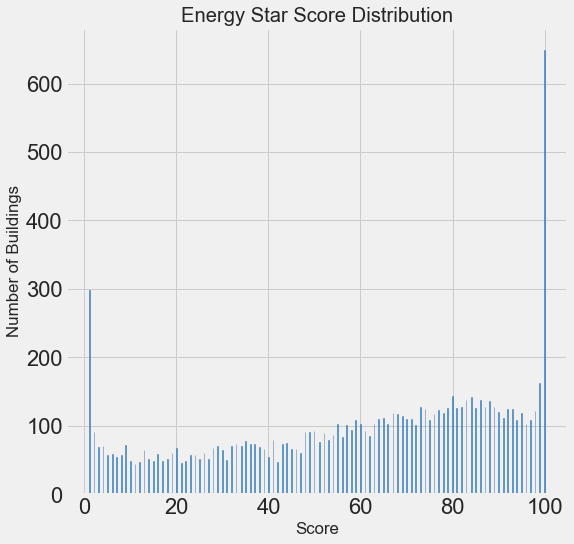

In [6]:
figsize(8, 8)

data = data.rename(columns = {'ENERGY STAR Score': 'score'}) # to typing easlily

plt.style.use('fivethirtyeight')

plt.hist(data['score'].dropna(), bins = 600, edgecolor = 'b'); 

plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 

plt.title('Energy Star Score Distribution');

It seems that original label (score) is not suitable because of the unheathy distribution on point 0 and point 100. 

So use __Site EUI (kBtu/ft²):能源使用强度__ to replace __score__

Text(0.5, 1.0, 'Site EUI Distribution')

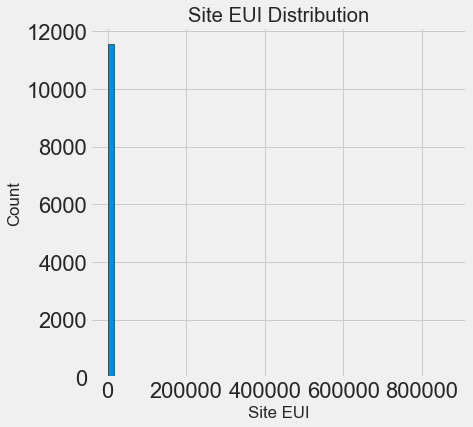

In [7]:
figsize(6, 6)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 50, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count'); plt.title('Site EUI Distribution')

In [8]:
data['Site EUI (kBtu/ft²)'].describe() 

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

So the __Site EUI__ columns exist some outliers, we should clear them.

In [9]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(30)

7593      12316.2
3665      13145.4
2303      14195.9
11186     15059.3
11189     16519.6
1256      17133.2
564       17193.4
2251      18235.7
546       18368.1
10710     18459.5
1276      19313.5
3163      22259.0
1595      24541.2
6885      25789.4
2155      26451.7
3265      28373.6
847       34326.8
3373      49340.7
3139      50621.6
2262      50823.6
3173      51328.8
3170      51831.2
3383      78360.1
8269      84969.6
3263      95560.2
8268     103562.7
8174     112173.6
3898     126307.4
7        143974.4
8068     869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

## 2.1 Drop outlinrs:

reference : [outliers](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)

In [10]:
# get 25% point and 75% point
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%'] 
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

interval = third_quartile - first_quartile

# preserve : Q3 - 3IQ  < EUI < Q3+ 3IQ . Deleted others.
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * interval)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * interval))]

Text(0.5, 1.0, 'Site EUI Distribution')

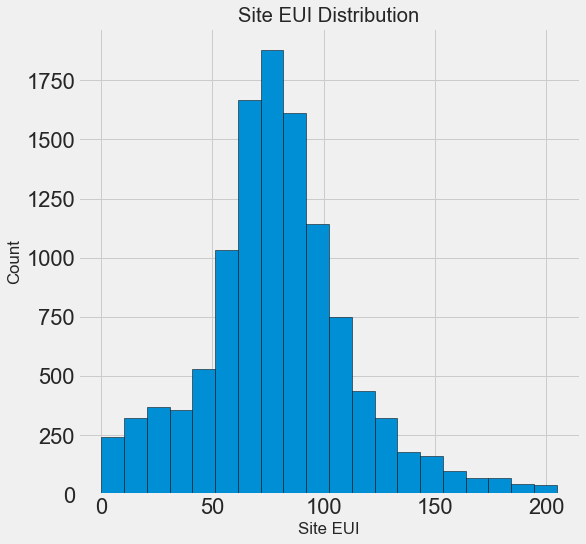

In [11]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

Now we got a  prefect result, which shows the feature is following the Gassuain Distribution.

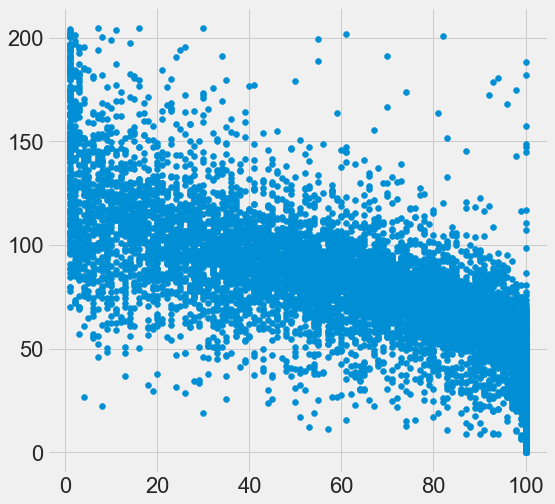

In [12]:
plt.scatter(data['score'],data['Site EUI (kBtu/ft²)'])
plt.show()

In [13]:
data.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area                                          float64
Primary Property Typ

In [14]:
types = data.dropna(subset=['score'])  
types = types['Largest Property Use Type'].value_counts()
types

Multifamily Housing                      7464
Office                                   1157
Hotel                                     202
Non-Refrigerated Warehouse                156
K-12 School                                97
Residence Hall/Dormitory                   96
Senior Care Community                      85
Distribution Center                        61
Retail Store                               57
Medical Office                             23
Hospital (General Medical & Surgical)      15
Financial Office                           12
Supermarket/Grocery Store                  10
Worship Facility                            9
Refrigerated Warehouse                      8
Parking                                     3
Wholesale Club/Supercenter                  3
Courthouse                                  2
Bank Branch                                 1
Name: Largest Property Use Type, dtype: int64

In [15]:
types = list(types[types.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Building Type')

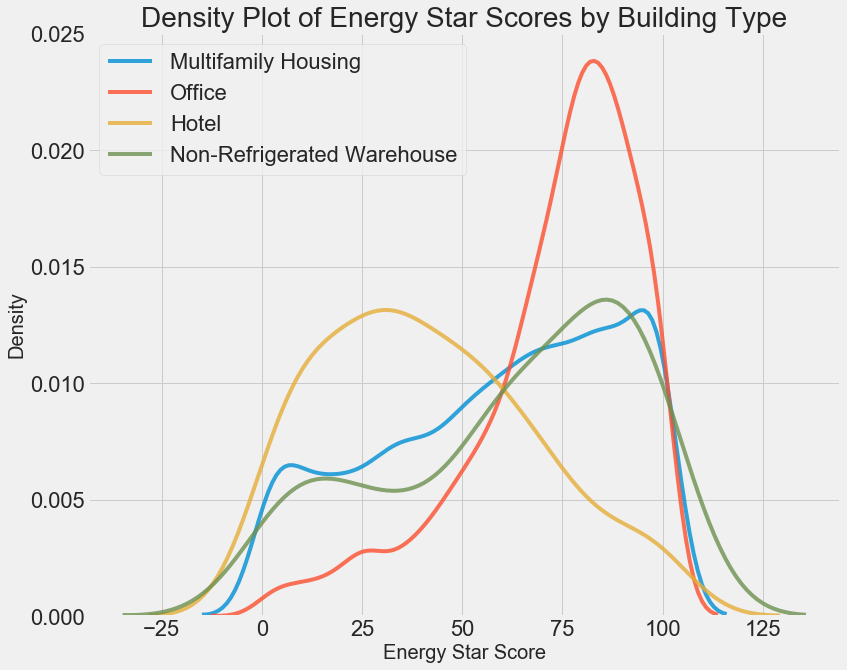

In [16]:
figsize(12, 10)

for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type] 
    
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)

The plot shows the score distribution based on diffierent typ of building, such as hotel, office or others.

In [17]:
data.Borough.dropna().value_counts()

Manhattan        5005
Brooklyn         2207
Queens           2000
Bronx            1878
Staten Island     147
Name: Borough, dtype: int64

In [18]:
boroughs = data.dropna(subset=['score'])['Borough'].value_counts().index

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

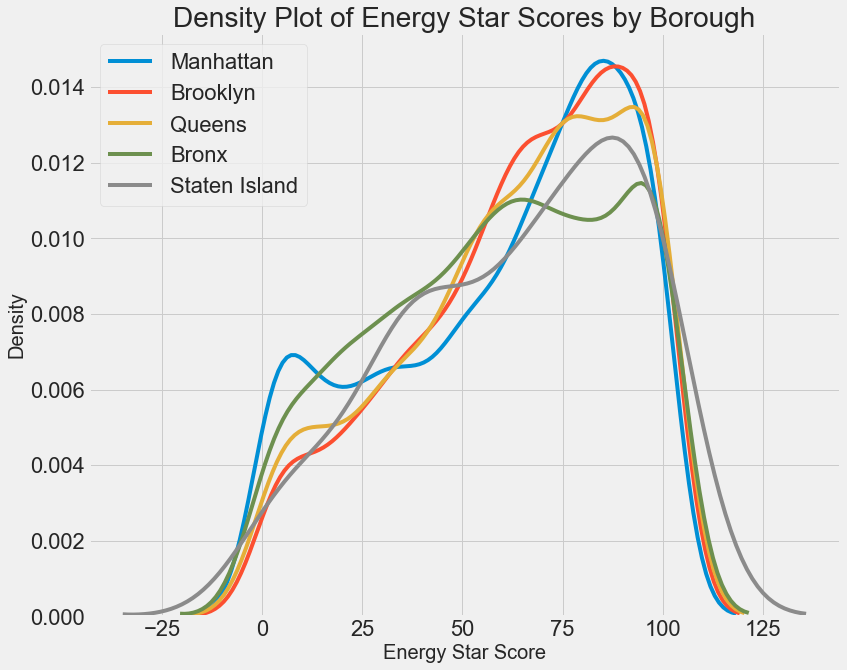

In [19]:
figsize(12, 10)
 
for borough in boroughs:
    
    subset = data[data['Borough'] == borough]
    
    
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    

plt.xlabel('Energy Star Score', size = 20)
plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Borough', size = 28)

Looks be the same type.

## 2.2 Correlation index analysis

In [20]:
correlations_data = data.corr()['score'].sort_values()

print(correlations_data.head(10), '\n')
print("---------------------------")
print(correlations_data.tail(10))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Name: score, dtype: float64 

---------------------------
Water Use (All Water Sources) (kgal)                 -0.013681
Water Intensity (All Water Sources) (gal/ft²)        -0.012148
Census Tract                                         -0.002299
DOF Gross Floor Area                       

In [21]:
import warnings
warnings.filterwarnings("ignore")

numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col != 'score':
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col]) # square root
        numeric_subset['log_' + col] = np.log(numeric_subset[col])   # log

        

categorical_subset = data[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1).dropna(subset = ['score'])

# calculate the correlate index.
correlations = features.corr()['score'].dropna().sort_values()

In [22]:
print(correlations.head(15), '\n')
print("---------------------------")
print(correlations.tail(15))

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

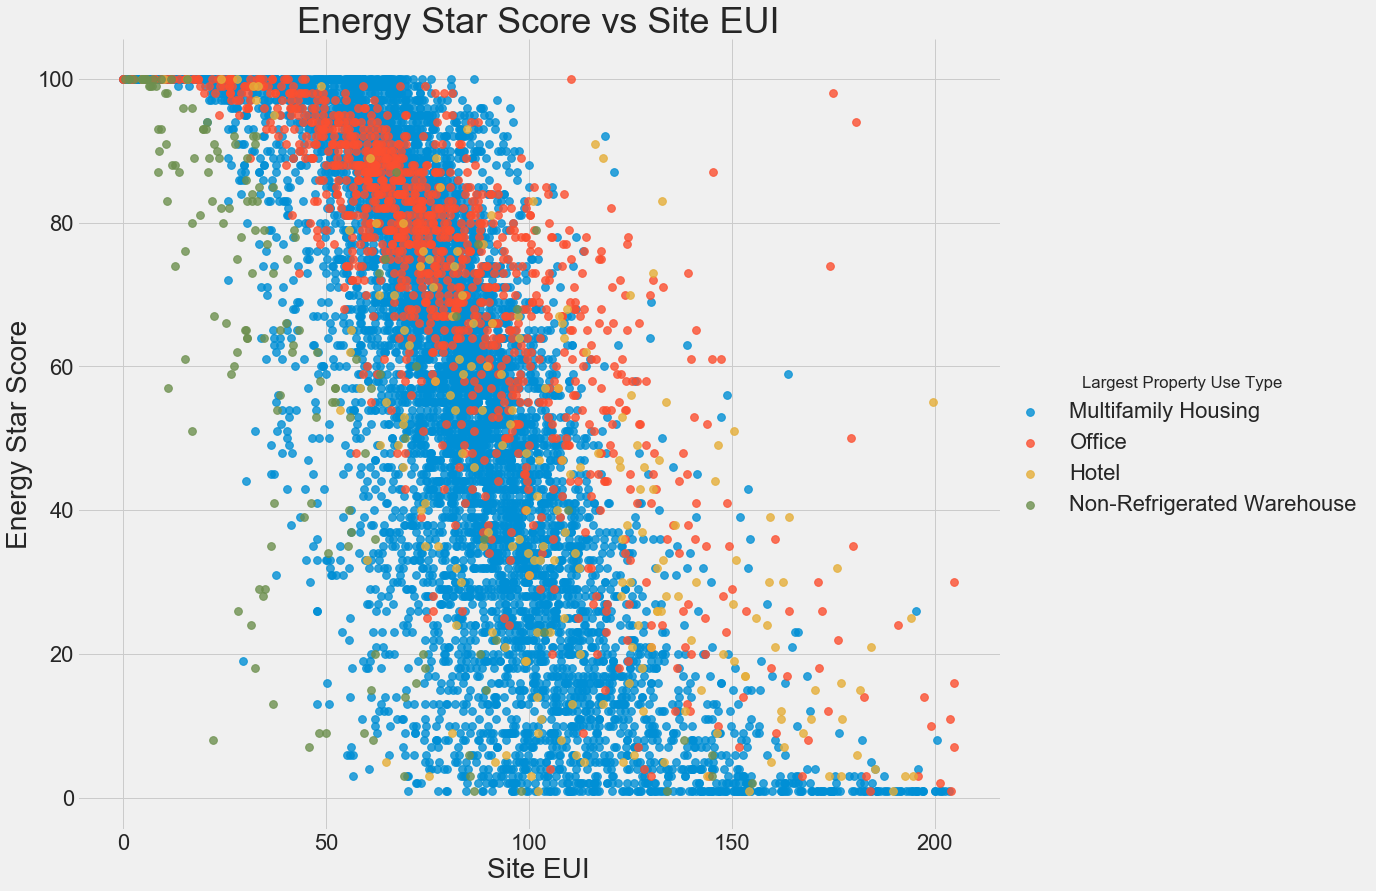

In [23]:
figsize(12, 10)

# 能源得分与城镇区域之间的关系
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Largest Property Use Type 最大财产使用类型 ,isin()接受一个列表,判断该列中4个属性是否在列表中
features = features[features['Largest Property Use Type'].isin(types)]

# hue = 'Largest Property Use Type'是4个种类变量 ，4个颜色
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
           # 种类变量，有4个种类，右下角hue是有4个种类变量，
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

# Step3:Feature Enginerr and Feature Selection

Reference: [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)


In [24]:
sf.data_info_desc(data)

Translation  \
Address 1 (self-reported)                                         地址1(自述)   
BBL - 10 digits                                                   桶- 10位数   
Borough                                                                 区   
Census Tract                                                          普查区   
Community Board                                                     社区委员会   
Council District                                                      议会区   
DOF Benchmarking Submission Status                             景深基准测试提交状态   
DOF Gross Floor Area                                              景深总建筑面积   
Direct GHG Emissions (Metric Tons CO2e)                 直接温室气体排放(吨当量二氧化碳)   
Electricity Use - Grid Purchase (kBtu)                      用电,电网购买(kBtu)   
Indirect GHG Emissions (Metric Tons CO2e)               间接温室气体排放(吨当量二氧化碳)   
Largest Property Use Type                                       最大的属性使用类型   
Largest Property Use Type - Gross Floor Area (ft²)  最大的属性使用类型——总建筑面积(英尺²)   
Latitude                                                         Latitude   
List of All Property Use Types at Property                  所有属性使用类型属性的列表   
Longitude                                                              经度   
Metered Areas  (Water)                                            计量领域(水)   
Metered Areas (Energy)                                           计量领域(能源)   
NTA                                                                   NTA   
NYC Borough, Block and Lot (BBL) self-reported            纽约区,块和很多(桶)自我报告   
NYC Building Identification Number (BIN)                       纽约建筑标识号(本)   
Natural Gas Use (kBtu)                                        天然气使用(kBtu)   
Number of Buildings - Self-reported                           数量的建筑——自我报告   
Occupancy                                                             入住率   
Order                                                                  订单   
Parent Property Id                                                  父属性Id   
Parent Property Name                                                 父属性名   
Postal Code                                                          邮政编码   
Primary Property Type - Self Selected                         主属性类型-自我选择的   
Property GFA - Self-Reported (ft²)                           财产GFA自述(英尺²)   
Property Id                                                          属性Id   
Property Name                                                         属性名   
Release Date                                                         发布日期   
Site EUI (kBtu/ft²)                                   Site EUI (kBtu/ft²)   
Source EUI (kBtu/ft²)                                        源行(kBtu²/英尺)   
Street Name                                                          街道名称   
Street Number                                                        街道号码   
Total GHG Emissions (Metric Tons CO2e)                  温室气体排放总量(吨当量二氧化碳)   
Water Intensity (All Water Sources) (gal/ft²)              水强度(水源)(加/英尺²)   
Water Required?                                                      需要水?   
Water Use (All Water Sources) (kgal)                          用水(水源)(法理上)   
Weather Normalized Site EUI (kBtu/ft²)                天气规范化网站行(kBtu /英尺²)   
Weather Normalized Site Electricity (kWh)                  天气网站规范化电力(千瓦时)   
Weather Normalized Site Electricity Intensity (...   天气规范化站点电力强度(千瓦时/英尺²)   
Weather Normalized Site Natural Gas Intensity (...   天气规范化网站天然气强度(千卡/英尺²)   
Weather Normalized Site Natural Gas Use (therms)         天气规范化网站天然气使用(千卡)   
Weather Normalized Source EUI (kBtu/ft²)               天气规范化源行(kBtu /英尺²)   
Year Built                                                            年建成   
score                                                                  分数   

                                                       Type  \
Address 1 (self-reported)                            object   
BBL - 10 digits                                      object   
Borough               

In [25]:
features = data.copy()

numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    if col != 'score':
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
categorical_subset = data[['Borough', 'Largest Property Use Type']]

categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(11319, 110)

In [26]:
features.head(2)

Order  Property Id  DOF Gross Floor Area  \
12     15      2637863                   NaN   
17     20      2777309                   NaN   

    Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
12                                           412503.0         1903   
17                                           323000.0         1907   

    Number of Buildings - Self-reported  Occupancy  score  \
12                                    2        100   93.0   
17                                    7        100    NaN   

    Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
12                 32.0                                     NaN   
17                120.0                                   125.2   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
12                                                7.5         
17                                                8.7         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
12                                                0.0            
17                                                0.9            

    Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
12                                       NaN               2047200.0   
17                                     193.6              52441239.4   

    Weather Normalized Site Natural Gas Use (therms)  \
12                                           20472.0   
17                                          556997.6   

    Electricity Use - Grid Purchase (kBtu)  \
12                              11241926.1   
17                              17958140.6   

    Weather Normalized Site Electricity (kWh)  \
12                                  3249755.2   
17                                  5217062.4   

    Total GHG Emissions (Metric Tons CO2e)  \
12                                  1194.0   
17                                  4554.7   

    Direct GHG Emissions (Metric Tons CO2e)  \
12                                    150.8   
17                                   2888.2   

    Indirect GHG Emissions (Metric Tons CO2e)  \
12                                     1043.2   
17                                     1666.5   

    Property GFA - Self-Reported (ft²)  Water Use (All Water Sources) (kgal)  \
12                            432503.0                               22061.0   
17                            598000.0                                   NaN   

    Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
12                                          51.01                   87.9   
17                                            NaN                  188.7   

    Latitude  Longitude  Community Board  Council District  Census Tract  \
12       NaN        NaN              NaN               NaN           NaN   
17       NaN        NaN              NaN               NaN           NaN   

    log_Order  ...  Largest Property Use Type_Museum  \
12   2.708050  ...                                 0   
17   2.995732  ...                                 0   

    Largest Property Use Type_Non-Refrigerated Warehouse  \
12                                                  0      
17                                                  0      

    Largest Property Use Type_Office  Largest Property Use Type_Other  \
12                                 0                                0   
17                                 0                                0   

    Largest Property Use Type_Other - Education  \
12                                            0   
17                                            0   

    Largest Property Use Type_Other - Entertainment/Public Assembly  \
12                                                  0                 
17                                                  0                 

    Largest Property Use Type_Other - Lodging/Residential  \
12                                                  0       
17          

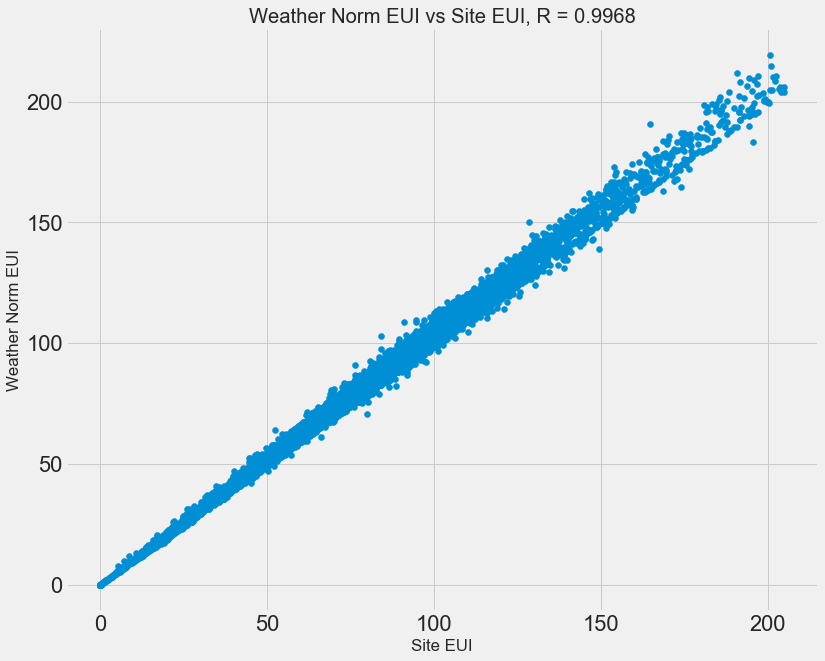

In [27]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.scatter(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'])

plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

## 3.1 Drop the collinear feature

In [28]:
def remove_collinear_features(x, threshold):
   
    y = x['score'] 
    x = x.drop(columns = ['score']) 
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1) 
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)] # 从第j行到j+1行，从i+1列到i+2列
            col = item.columns #列位置
            row = item.index # 行位置
            val = abs(item.values) #abs() 函数返回数字的绝对值，item.values相关性的矩阵的向量
            
            if val >= threshold:
                
                drop_cols.append(col.values[0]) 


    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    x['score'] = y
               
    return x

In [29]:
features.corr()

Order  Property Id  \
Order                                               1.000000     0.060538   
Property Id                                         0.060538     1.000000   
DOF Gross Floor Area                               -0.142938    -0.086318   
Largest Property Use Type - Gross Floor Area (ft²) -0.140158    -0.064985   
Year Built                                          0.156827     0.066105   
...                                                      ...          ...   
Largest Property Use Type_Strip Mall                0.011788     0.022064   
Largest Property Use Type_Supermarket/Grocery S...  0.046157    -0.004559   
Largest Property Use Type_Urgent Care/Clinic/Ot...  0.004046     0.004368   
Largest Property Use Type_Wholesale Club/Superc...  0.020500     0.010879   
Largest Property Use Type_Worship Facility          0.017817     0.017186   

                                                    DOF Gross Floor Area  \
Order                                                          -0.142938   
Property Id                                                    -0.086318   
DOF Gross Floor Area                                            1.000000   
Largest Property Use Type - Gross Floor Area (ft²)              0.853698   
Year Built                                                      0.109731   
...                                                                  ...   
Largest Property Use Type_Strip Mall                            0.004988   
Largest Property Use Type_Supermarket/Grocery S...             -0.004314   
Largest Property Use Type_Urgent Care/Clinic/Ot...             -0.004976   
Largest Property Use Type_Wholesale Club/Superc...             -0.002160   
Largest Property Use Type_Worship Facility                     -0.007937   

                                                    Largest Property Use Type - Gross Floor Area (ft²)  \
Order                                                                                       -0.140158    
Property Id                                                                                 -0.064985    
DOF Gross Floor Area                                                                         0.853698    
Largest Property Use Type - Gross Floor Area (ft²)                                           1.000000    
Year Built                                                                                   0.097945    
...                                                                                               ...    
Largest Property Use Type_Strip Mall                                                         0.000901    
Largest Property Use Type_Supermarket/Grocery S...                                          -0.012890    
Largest Property Use Type_Urgent Care/Clinic/Ot...                                          -0.004931    
Largest Property Use Type_Wholesale Club/Superc...                                          -0.002943    
Largest Property Use Type_Worship Facility                                                  -0.008366    

                                                    Year Built  \
Order                                                 0.156827   
Property Id                                           0.066105   
DOF Gross Floor Area                                  0.109731   
Largest Property Use Type - Gross Floor Area (ft²)    0.097945   
Year Built                                            1.000000   
...                                                        ...   
Largest Property Use Type_Strip Mall                  0.023711   
Largest Property Use Type_Supermarket/Grocery S...    0.037165   
Largest Property Use Type_Urgent Care/Clinic/Ot...    0.010911   
Largest Property Use Type_Wholesale Club/Superc...    0.029085   
Largest Property Use Type_Worship Facility           -0.012624   

                                                    Number of Buildings - Self-reported  \
Order                                                       

In [30]:
# 设置阈值0.6 ，tem.values相关性的矩阵的向量大于0.6的
features = remove_collinear_features(features, 0.6);

In [31]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

# Step4: Create Model

In [32]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)


import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize


import seaborn as sns
sns.set(font_scale = 2)

from sklearn.preprocessing import Imputer, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# 调参数
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [33]:
no_score = features[features['score'].isnull()]

score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [34]:
targets = pd.DataFrame(score['score'])

features = score.drop(columns='score').replace({np.inf: np.nan, -np.inf: np.nan}) 
# delete the max and min number. Because the score is not heathy at the 100 point and 0 point.

xta, xts, yta, yts = train_test_split(features, targets, test_size = 0.3, random_state = 56)

In [35]:
# def a MAE masuring function. 
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [38]:
baseline_guess = np.median(yta) # mean of train set
# this is our a guess based on our business insight.

print('The baseline guess is a score of %0.2f' % baseline_guess) 
print("Baseline Performance on the test set: MAE = %0.4f" % mae(yts, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.7904


## 4.1 Fill None Values

In [39]:
imputer = Imputer(strategy='median') # 中位数策略
imputer.fit(xta)

xta = imputer.transform(xta)
xts = imputer.transform(xts)

In [40]:
print('Missing values in training features: ', np.sum(np.isnan(xta)))
print('Missing values in testing features:  ', np.sum(np.isnan(xts)))

Missing values in training features:  0
Missing values in testing features:   0


## 4.2 Stardardise

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(xta)

xta = scaler.transform(xta)
xts = scaler.transform(xts)

In [127]:
# change the shape
yta = np.array(yta).reshape((-1,))
yts = np.array(yts).reshape((-1, ))

## 4.3 Algrithms
    1. Linear Regression
    2. Support Vector Machine Regression
    3. Random Forest Regression
    4. Gradient Boosting Regression
    5. K-Nearest Neighbors Regression

In [45]:
def fit_and_evaluate(model):
    # The most important evaluation function of the model.
    model.fit(xta, yta)
    
    model_pred = model.predict(xts)
    model_mae = mae(yts, model_pred)
    
    return model_mae

In [46]:
# evalueate the ability of default models.

lr = LinearRegression()
svm = SVR(C = 1000, gamma = 0.1)
random_forest = RandomForestRegressor(random_state=60)
gradient_boosted = GradientBoostingRegressor(random_state=60)
knn = KNeighborsRegressor(n_neighbors=10)

for model in [lr,svm,random_forest,gradient_boosted,knn]:
    ec = fit_and_evaluate(model)
    print(f"{model.__class__} MAE = {ec}")

<class 'sklearn.linear_model.base.LinearRegression'> MAE = 13.748739826201199
<class 'sklearn.svm.classes.SVR'> MAE = 11.062296931730788
<class 'sklearn.ensemble.forest.RandomForestRegressor'> MAE = 10.11278619232124
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'> MAE = 9.985211284118732
<class 'sklearn.neighbors.regression.KNeighborsRegressor'> MAE = 12.632194434660093


So GradientBoostingRegressor is the best model.

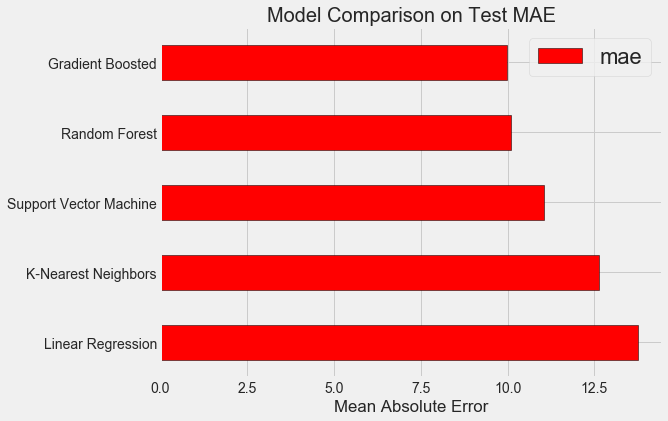

In [47]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [fit_and_evaluate(lr), fit_and_evaluate(svm), fit_and_evaluate(random_forest), 
                                         fit_and_evaluate(gradient_boosted), fit_and_evaluate(knn)]})

model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')
plt.ylabel('')
plt.yticks(size = 14)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

- 图中要求的是损失越来越低，线性回归和KNN用的实际并不是很高频
- 看起来集成算法更占优势一些，这里存在一些不公平，因为参数只用了默认，但是对于SVM来说参数可能影响会更大一些。

## 4.4 模型调参

以GBDT为例，因为最近在学习这个model

- GBDT的损失函数

    loss：表示损失函数，可选项为{'ls', 'lad', 'huber', 'quantile'}，默认是'ls'；'ls'（least squares）指的是最小二乘法（即最小化均方差），适合数据噪点不多的情况下，因为对于异常点会施以较大的惩罚；'lad'（least absolute deviation）指的是最小化绝对偏差，如果有较多异常点，则绝对值损失表现较好，但绝对值损失的缺点是在y−f(x)=0处不连续可导，因而不容易优化；'huber'是对'ls'和'lad'的综合，当|y−f(x)|小于一个事先指定的值δ时，变为平方损失，大于δ时，则变成类似于绝对值损失，因此也是比较鲁棒（健壮）的损失函数；'quantile'指的是分位数损失函数，它允许分位数回归（使用alpha来指定分位数）；

In [54]:
loss = ['ls', 'lad', 'huber']

# 在集成算法中使用的树的数量
n_estimators = [100, 500, 900, 1100, 1500]

# 对应的每棵树的深度
max_depth = [2, 3, 5, 10, 15]

# 对应的每棵树的最小叶子数
min_samples_leaf = [1, 2, 4, 6, 8]

# 分割样本的时候分几次
min_samples_split = [2, 4, 6, 10]


hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': [None]}

paragams explain：[Scikit-Learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor). 

* `estimator`: the model
* `param_distributions`: the distribution of parameters we defined
* `cv` the number of folds to use for k-fold cross validation
* `n_iter`: the number of different combinations to try
* `scoring`: which metric to use when evaluating candidates
* `n_jobs`: number of cores to run in parallel (-1 will use all available)
* `verbose`: how much information to display (1 displays a limited amount) 
* `return_train_score`: return the training score for each cross-validation fold
* `random_state`: fixes the random number generator used so we get the same results every run


In [55]:
model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=model, 
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, #迭代25次 ，也就是25组参数
                               scoring = 'neg_mean_absolute_error', #选择好结果的评估值
                               #-1用所有的CPU跑这个东西
                               n_jobs = -1, verbose = 1, 
                               #默认的返回的值
                               return_train_score = True,
                               random_state=42)

In [56]:
import time
a = time.time()
random_cv.fit(xta, yta)
print(time.time()-a)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.2min finished


677.026754617691


In [60]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7       20.617335      0.447695         0.030737    9.159614e-04   
12      34.958740      1.283734         0.049236    1.137918e-03   
8       39.649413      0.837503         0.052390    3.469586e-03   
23      61.962295      0.314210         0.079870    1.120891e-02   
15      55.195381      1.179923         0.066685    4.777678e-03   
21      30.505473      0.257027         0.042829    4.349491e-03   
0       12.272171      0.521360         0.015621    7.633119e-07   
5       42.325455      0.386995         0.055421    4.151176e-03   
10      82.280811      0.988923         0.117849    3.007716e-03   
20      40.442543      0.690771         0.054919    4.598769e-03   
9       57.458688      0.373339         0.082613    3.476515e-03   
1       93.122789      1.500550         0.130871    3.800720e-05   
13      95.306060      2.056320         0.132208    1.681501e-02   
17      24.943976      0.438786         0.032804    3.296605e-03   
6       21.053352      0.258594         0.030272    7.215793e-04   
16      74.263963      2.407571         0.090667    7.149589e-03   
22       2.857139      0.018085         0.005046    5.045950e-03   
19       7.919043      0.057428         0.017138    4.154137e-03   
4       61.373137      1.716209         0.101772    9.065694e-03   
24      79.461958      1.129051         0.094811    1.118547e-02   
3       67.104200      2.606665         0.107325    4.540201e-03   
11     129.330235      5.439218         0.184601    2.875757e-02   
18      84.784735      1.339020         0.128564    3.326398e-03   
2       70.325955      1.213868         0.115829    4.151239e-03   
14       2.057930      0.122284         0.004024    4.024164e-03   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
7                 500                       2                      4   
12                900                       6                      1   
8                 900                       6                      6   
23               1500                       4                      4   
15               1100                       4                      6   
21               1100                       4                      2   
0                 500                      10                      1   
5                 500                       2                      6   
10               1100                       4                      8   
20               1500                      10                      8   
9                1500                      10                      4   
1                1100                       4                      6   
13                900                       2                      8   
17                900                       4                      1   
6                1100                       2                      6   
16                500                       6                      8   
22                100                       6                      8   
19                500                       6                      4   
4                 500                       6                      4   
24               1500                      10                      1   
3                1100                       6                      1   
11                900                       6                      2   
18               1100                       6                      2   
2                 900                       2                      2   
14                100                       6                      6   

   param_max_features param_max_depth param_loss  \
7                None               5        lad   
12               None               5        lad   
8                None               5      huber   
23               None               5      huber   
15               None               5      huber   
21               None               3      huber  

In [61]:
random_cv.best_estimator_ #最好的参数

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Adjust the paramter again.

In [62]:
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}


model = GradientBoostingRegressor(loss = 'lad', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [63]:
grid_search.fit(xta, yta)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='lad', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

## 4.5 对比MAE

In [67]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.881832      0.044316         0.007810        0.007810   
1        5.687648      0.067190         0.007810        0.007810   
2        7.553365      0.142145         0.011715        0.006764   
3        9.821830      0.096271         0.011990        0.006936   
4       11.729663      0.180282         0.015622        0.000001   
5       13.446920      0.203553         0.015621        0.000001   
6       15.041895      0.260039         0.019527        0.006764   
7       17.002725      0.211253         0.018137        0.003486   
8       18.692430      0.205384         0.020646        0.000882   
9       20.600987      0.166366         0.023672        0.003870   
10      23.403054      0.440165         0.028919        0.004062   
11      25.791427      0.356269         0.029746        0.000872   
12      27.634182      0.384792         0.036759        0.003869   
13      29.599598      0.313423         0.030987        0.000443   
14      22.101433      0.643299         0.019527        0.006764   

   param_n_estimators                 params  split0_test_score  \
0                 100  {'n_estimators': 100}          -8.927014   
1                 150  {'n_estimators': 150}          -8.877585   
2                 200  {'n_estimators': 200}          -8.840952   
3                 250  {'n_estimators': 250}          -8.821853   
4                 300  {'n_estimators': 300}          -8.817960   
5                 350  {'n_estimators': 350}          -8.806141   
6                 400  {'n_estimators': 400}          -8.802972   
7                 450  {'n_estimators': 450}          -8.789611   
8                 500  {'n_estimators': 500}          -8.791746   
9                 550  {'n_estimators': 550}          -8.786607   
10                600  {'n_estimators': 600}          -8.787369   
11                650  {'n_estimators': 650}          -8.767519   
12                700  {'n_estimators': 700}          -8.766541   
13                750  {'n_estimators': 750}          -8.764762   
14                800  {'n_estimators': 800}          -8.767829   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           -9.218292          -9.153901          -9.559394        -9.214608   
1           -9.150525          -9.069123          -9.480121        -9.144299   
2           -9.087960          -9.037710          -9.448775        -9.103807   
3           -9.057725          -9.011493          -9.431135        -9.080509   
4           -9.031602          -9.001549          -9.417093        -9.067008   
5           -9.028839          -8.982471          -9.414864        -9.058036   
6           -9.021178          -8.972829          -9.400455        -9.049317   
7           -9.000836          -8.952180          -9.394632        -9.034273   
8           -8.999786          -8.939564          -9.388928        -9.029965   
9           -8.975186          -8.936525          -9.392934        -9.022770   
10          -8.975250          -8.935090          -9.389935        -9.021868   
11          -8.974192          -8.918179          -9.391054        -9.012693   
12          -8.971750          -8.924016          -9.381342        -9.010870   
13          -8.960245          -8.923682          -9.361702        -9.002555   
14          -8.949921          -8.912738          -9.348563        -8.994722   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.226536               15           -7.908111           -7.983849   
1         0.217709               14           -7.634417           -7.785435   
2         0.219487               13           -7.414243           -7.639758   
3         0.220854               12           -7.262472           -7.510861   
4         0.218004               11           -7.150921           -7.426909   
5         0.222103               10           -7.097051           -7.359151   
6       

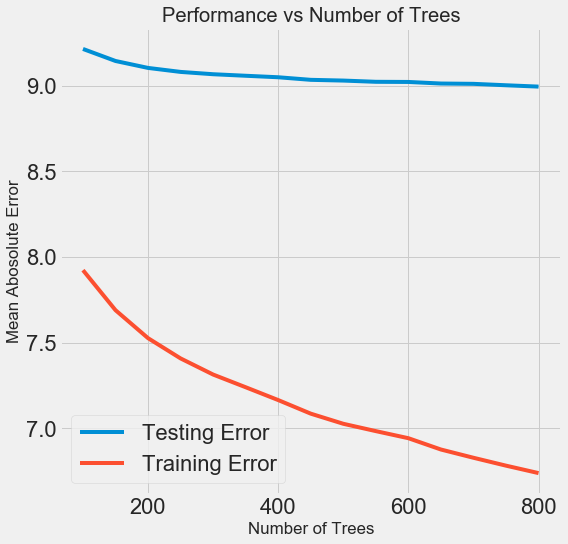

In [64]:
results = pd.DataFrame(grid_search.cv_results_)


figsize(8, 8)
plt.style.use('fivethirtyeight')

plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

The figure shows that our model is overfitting.

In [65]:
results.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
14      22.101433      0.643299         0.019527        0.006764   
13      29.599598      0.313423         0.030987        0.000443   
12      27.634182      0.384792         0.036759        0.003869   
11      25.791427      0.356269         0.029746        0.000872   
10      23.403054      0.440165         0.028919        0.004062   

   param_n_estimators                 params  split0_test_score  \
14                800  {'n_estimators': 800}          -8.767829   
13                750  {'n_estimators': 750}          -8.764762   
12                700  {'n_estimators': 700}          -8.766541   
11                650  {'n_estimators': 650}          -8.767519   
10                600  {'n_estimators': 600}          -8.787369   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
14          -8.949921          -8.912738          -9.348563        -8.994722   
13          -8.960245          -8.923682          -9.361702        -9.002555   
12          -8.971750          -8.924016          -9.381342        -9.010870   
11          -8.974192          -8.918179          -9.391054        -9.012693   
10          -8.975250          -8.935090          -9.389935        -9.021868   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
14        0.215284                1           -6.555829           -6.955826   
13        0.219954                2           -6.587535           -7.007512   
12        0.226933                3           -6.617576           -7.070034   
11        0.231114                4           -6.671741           -7.103148   
10        0.223685                5           -6.768780           -7.118084   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
14           -6.759072           -6.681873         -6.738150         0.145111  
13           -6.798106           -6.733180         -6.781583         0.151091  
12           -6.838217           -6.784675         -6.827626         0.161895  
11           -6.879584           -6.848749         -6.875805         0.153357  
10           -6.980824           -6.899732         -6.941855         0.126792

## 4.6 Evluation and test

In [74]:
default_model = GradientBoostingRegressor(random_state = 42)
default_model.fit(xta,yta)

final_model = grid_search.best_estimator_

sample_model = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
sample_model.fit(xta,yta)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
final_model.score(xta,yta)

0.8604510410781562

In [75]:
default_pred = default_model.predict(xts)
final_pred = final_model.predict(xts)
sample_pred = sample_model.predict(xts)
print('Default model performance on the test set: MAE = %0.4f.' % mae(yts, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(yts, final_pred))
print('sample model performance on the test set:   MAE = %0.4f.' % mae(yts, sample_pred))

Default model performance on the test set: MAE = 9.9873.
Final model performance on the test set:   MAE = 9.1873.
sample model performance on the test set:   MAE = 9.2642.


对比试验结果，训练时间差异较大但是模型差不多得到了10%的提升。虽然花了不少时间，但都是值得的。

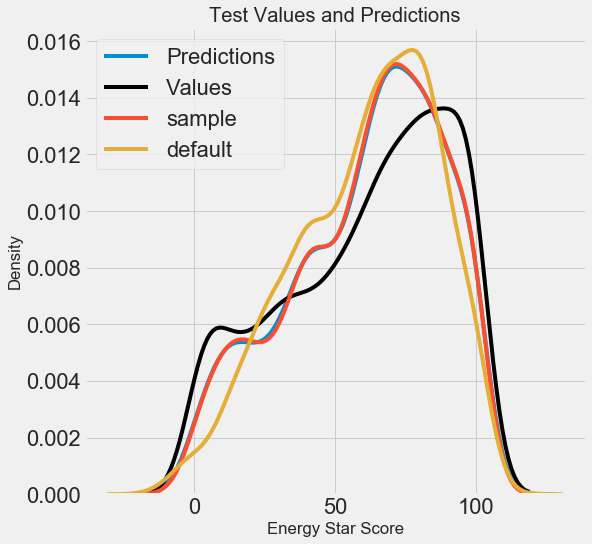

In [81]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(yts, label = 'Values',color = 'black')
sns.kdeplot(sample_pred, label = 'sample')
sns.kdeplot(default_pred, label = 'default')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

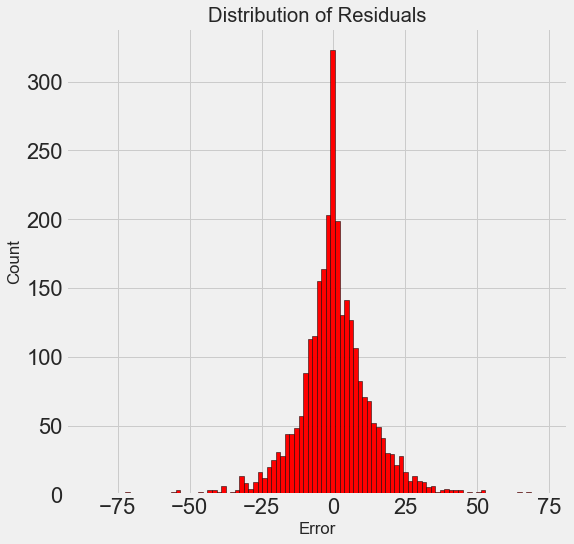

In [88]:
figsize = (6, 6)

residuals = final_pred - yts

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 100,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

- 残差分布情况

# Step5: Model Explain

In [92]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

sns.set(font_scale = 2)

# Imputing missing values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import tree

# LIME只会对每一个样本进行解释
import lime
import lime.lime_tabular


import warnings
warnings.filterwarnings("ignore")

In [93]:
model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

model.fit(xta, yta)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
model_pred = model.predict(xts)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(yts, model_pred))

Final Model Performance on the test set: MAE = 9.1873


## 5.1 特征重要性

[sklearn中特征重要性的计算方法](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined)

In [96]:
# 特征重要度
feature_results = pd.DataFrame({'feature': list(features.columns),  #所有的训练特征
                                'importance': model.feature_importances_})

# 展示前10名的重要的特征 ，降序  
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0                                Site EUI (kBtu/ft²)    0.571547
1      Largest Property Use Type_Multifamily Housing    0.167338
2  Weather Normalized Site Electricity Intensity ...    0.059905
3                                        Property Id    0.027694
4                               DOF Gross Floor Area    0.024319
5        log_Direct GHG Emissions (Metric Tons CO2e)    0.021047
6                                              Order    0.020564
7                                         Year Built    0.020212
8                                          Longitude    0.013052
9  log_Water Intensity (All Water Sources) (gal/ft²)    0.011605

- 差异还是蛮大的，画图来看更清楚

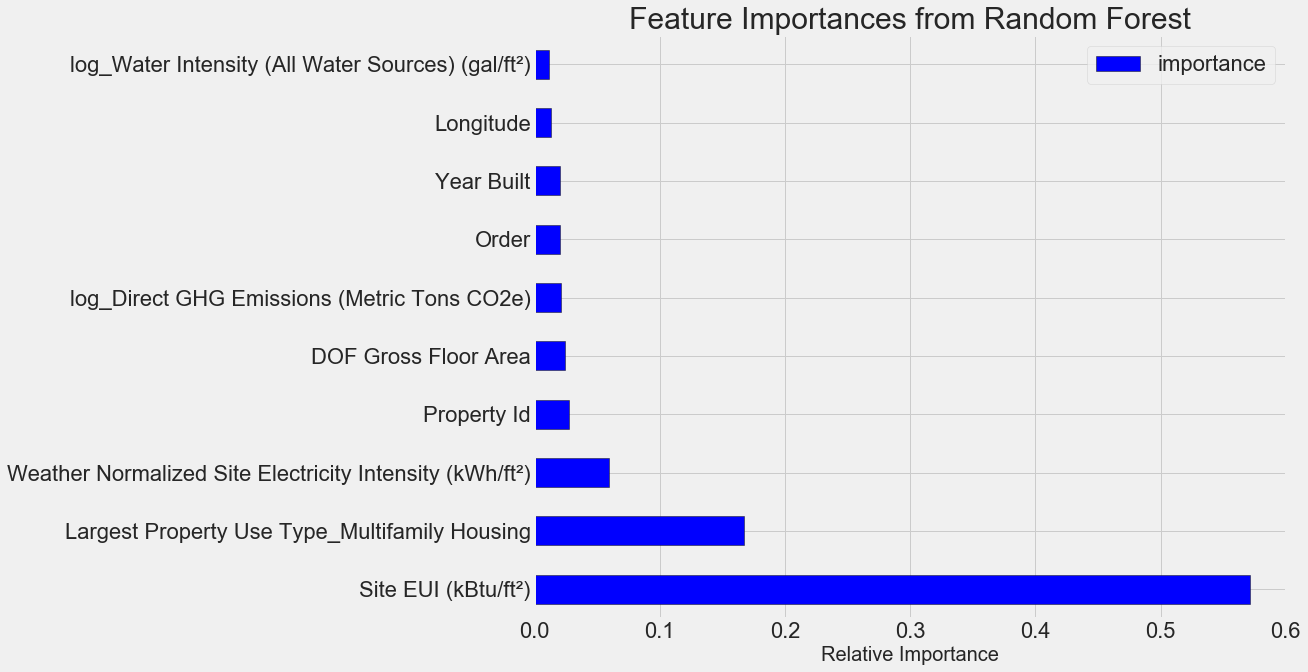

In [97]:
figsize(12, 10)
plt.style.use('fivethirtyeight')

feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue'); #barh：直方图横着
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

## 5.2 Remode based on top 20 important features

In [103]:
most_important_features = feature_results['feature'][:20]

indices = [list(features.columns).index(x) for x in most_important_features]


X_reduced = xta[:, indices]
X_test_reduced = xts[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6622, 20)
Most important testing  features shape:  (2839, 20)


it shows that the model become worse

In [104]:
lr = LinearRegression()


lr.fit(xta, yta)
lr_full_pred = lr.predict(xts)


lr.fit(X_reduced, yta)
lr_reduced_pred = lr.predict(X_test_reduced)


print('Linear Regression Full Results: MAE =    %0.4f.' % mae(yts, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(yts, lr_reduced_pred))

Linear Regression Full Results: MAE =    13.7487.
Linear Regression Reduced Results: MAE = 14.1599.


In [107]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, yta)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(yts, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 9.3009


## 5.3 The best/worst prediction vlues

In [108]:
# Find the residuals
residuals = abs(model_reduced_pred - yts)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [110]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced, 
                                                   mode = 'regression',
                                                   training_labels = yta,
                                                   feature_names = list(most_important_features))

Prediction: 9.4877
Actual Value: 98.0000


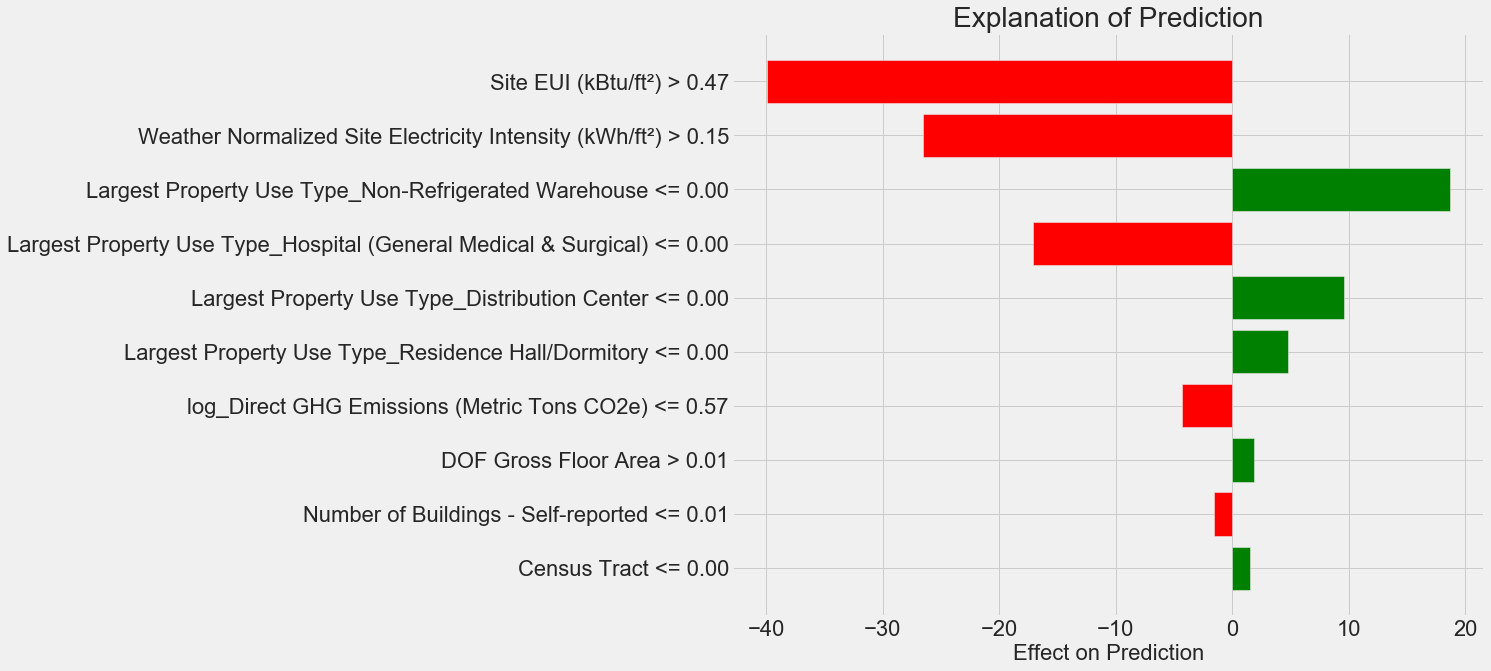

In [112]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % yts[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [113]:
wrong_exp.show_in_notebook(show_predicted_value=False)

Prediction: 100.0000
Actual Value: 100.0000


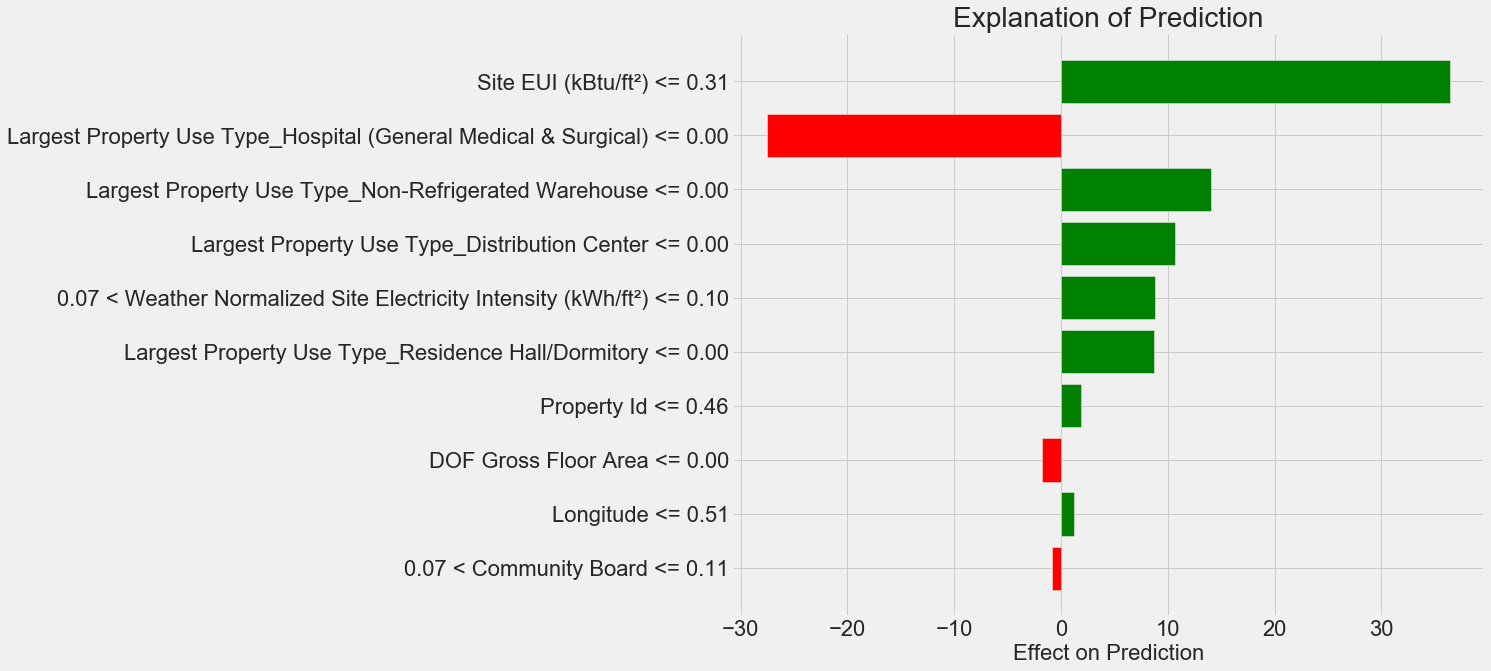

In [115]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % yts[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [116]:
right_exp.show_in_notebook(show_predicted_value=False)